# Module 6: Basic Data Analysis using Pandas

Now that we've tackled the basic Python programming concepts including package installation and file I/O operations, we can now dive deep into basic data analysis using Pandas.

> **NOTE:** This is a **complementary** module for **Module 5**, so please make sure you've **finished the course** before jumping into this module!

## Introduction

**The United States Office of Research Integrity** describes **Data Analysis** as "the process of systematically applying statistical and/or logical techniques to describe and illustrate, condense and recap, and evaluate data." With Data Analysis, you can clean and process data to help you make sound decisions.

**Pandas** is an **open-source** third-party library created by Wes McKinney in 2008 that is well-known for its extensive abilities as a **data manipulation and analysis tool**. According to the official Pandas website, the library is in use in a wide variety of academic and commercial domains, including (but not limited to) finance, neuroscience, economics, statistics, advertising, and web analytics. Some of its main features include:
- A fast and efficient DataFrame object for data manipulation with integrated indexing;
- Tools for reading and writing data between in-memory data structures and different formats: CSV and text files, Microsoft Excel, SQL databases, and the fast HDF5 format;
- Intelligent data alignment and integrated handling of missing data: gain automatic label-based alignment in computations and easily manipulate messy data into an orderly form;
- Flexible reshaping and pivoting of data sets;
- Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
- Columns can be inserted and deleted from data structures for size mutability; 
- Aggregating or transforming data with a powerful group by engine allowing split-apply-combine operations on data sets;
- High performance merging and joining of data sets;
- Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
- Time series-functionality: date range generation and frequency conversion, moving window statistics, date shifting and lagging. Even create domain-specific time offsets and join time series without losing data;
- Highly optimized for performance, with critical code paths written in Cython or C.

With Python and Pandas, you can perform Data Analysis much more efficiently! In this module, we'll learn some basic concepts, including:
1. Package Installation
2. Opening Excel Files
3. Pandas Object Creation
4. Pandas Data Structures
5. Indexing and Selection
6. Statistical Operations

## Installation

To start using **Pandas**, we need to install the library along with its dependencies first. We also need to install **Openpyxl** to be able to access Excel files, which is the file extension of the data we'll be analyzing for this module.

On your IDE Terminal, type in:

`pip install pandas openpyxl`

This should then start the installation of the latest version of **Pandas** and **Openpyxl**, along with the following dependencies of Pandas (if not yet installed):
- **NumPy** - adds support for large, multi-dimensional arrays, matrices and high-level mathematical functions to operate on these arrays
- **python-dateutil** - provides powerful extensions to the standard datetime module
- **pytz** - brings the Olson tz database into Python which allows accurate and cross platform timezone calculations

Once the installation has been completed, we can now start using Pandas and its dependencies in our Python code by using the **import** keyword.


## Sample Scenario

For our sample scenario, I have provided a dataset along with this module. **Datasets**, coming from its root words **"data"** and **"sets"**, are collections of related sets of valuable data, which can be cleaned, processed and analyzed to come up with conclusions. For this module, I have provided an Excel dataset [from **Kaggle**](https://www.kaggle.com/datasets/weinoose/formula-one-complete-data-20062013) containing the complete stats of **Formula One** manufacturers from **2006** to **2013**.

[**Kaggle**](https://www.kaggle.com) is a place where you can upload and download datasets. Once you're confident enough to dabble with other sample datasets, feel free to sign up and explore the site!


## Opening Excel Files and Object Creation

To open Excel files, we have installed the **Openpyxl** package. Now, to begin, let's use the **import** keyword to use the packages.

`import pandas as pd
import numpy as np
import openpyxl`

Notice how we used **"as"** followed by **"pd"** and **"np"**? This serves as the **alias** for the **package**. That way, when calling the functions of **Pandas** and **NumPy** packages, we'll only need to use **"pd"** and **"np"** as a prefix.

Now, let's go ahead and call Pandas' read_excel() function. To do this, let's type in:

 `pd.read_excel('<filepath of the excel file>', sheet_name='<name of the sheet to access>')`
 
In this case, the **filename** of our **dataset** is **"Formula One data.xlsx"**. If the file is **NOT** located in the **same folder** where this **_.ipynb_** file is, we need to declare the whole **filepath**. Otherwise, only the **filename** is needed.

By default, the **read_excel()** function opens the first sheet in the file. As a good practice, however, let's specify the **sheet name**. Since we only have one sheet named **"ENTRANTS"**, let's go ahead and type that in.

Once done, let's assign the result to a variable named **formula_one_df** to create a **Pandas object**. Once we print this variable, we should then see a formatted table showing the values of the Excel sheet we're trying to open. Additionally, we can use the **style** property to display the data in a properly rendered table. With this, there's no need to use **print()** since Jupyter Notebook is smart enough to render this automatically once called!

In [120]:
import pandas as pd
import numpy as np
import openpyxl

formula_one_df = pd.read_excel('Formula One data.xlsx', sheet_name='ENTRANTS')
formula_one_df.style

,RANK,TITLE,CHAMPIONSHIPS,WIN,PODIUM,POINTS SCORED,POLE POSITION,FASTEST LAP,RACE ENTRY,SEASONS
0,1,Brawn GP F1 Team,1,8,15,448,5,4,17,1
1,2,Caterham F1 Team,0,0,0,0,0,0,39,2
2,3,Force India F1 Team,0,0,1,359,1,1,112,6
3,4,Honda Racing F1 Team,0,1,3,302,1,0,53,3
4,5,HRT F1 Team,0,0,0,0,0,0,58,3
5,6,Lotus F1 Team,0,2,24,618,0,5,39,2
6,7,Marussia F1 Team,0,0,0,0,0,0,39,2
7,8,McLaren F1 Team,0,35,131,2839,32,26,147,8
8,9,Mercedes GP F1 team,0,4,15,881,9,4,77,4
9,10,Midland F1 Team,0,0,0,3,0,0,18,1


> **NOTE:** If the dataset is too long to display, you can make use of the **head()** and **tail()** functions to display just a small sample of rows at the topmost or bottommost. These functions accept an optional number as a parameter to display specific number of rows.

In [124]:
print('Topmost:')
formula_one_df.head().style

Topmost:


,RANK,TITLE,CHAMPIONSHIPS,WIN,PODIUM,POINTS SCORED,POLE POSITION,FASTEST LAP,RACE ENTRY,SEASONS
0,1,Brawn GP F1 Team,1,8,15,448,5,4,17,1
1,2,Caterham F1 Team,0,0,0,0,0,0,39,2
2,3,Force India F1 Team,0,0,1,359,1,1,112,6
3,4,Honda Racing F1 Team,0,1,3,302,1,0,53,3
4,5,HRT F1 Team,0,0,0,0,0,0,58,3


In [123]:
print('\nBottommost:')
formula_one_df.tail(3).style # Display only the last 3 rows in the DataFrame


Bottommost:


,RANK,TITLE,CHAMPIONSHIPS,WIN,PODIUM,POINTS SCORED,POLE POSITION,FASTEST LAP,RACE ENTRY,SEASONS
18,19,Toyota Racing,0,0,8,474,1,2,70,4
19,20,Virgin Racing,0,0,0,0,0,0,38,2
20,21,Williams Racing,0,1,4,467,2,3,147,8


Cool, isn't it? The **read_excel()** function also comes with other optional parameters that can be utilized based on your use case. You can check out the other parameters along with examples [by visiting the **documentation**](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

## Data Structures in Pandas

To start working with Pandas, it's important to get familiarized with its fundamental data structures. 

### Series

**Series** is a _one-dimensional_ labeled array that can hold different data types such as integers, strings, floating point numbers, and Python objects. The axis labels are collectively referred to as the **index**. To create a Series, simply type in:

`pd.Series(data, index=index)`

The **index**, on the other hand, would be the label for the **data**. By default, the **index** would be a number starting from 0, as shown in the **formula_one_df** variable printed above. The indexes are the numbers starting from 0 to 20. Therefore, passing the index value is optional if we're fine with retaining the default.

For dictionaries, the keys become the indexes by default. To test this, let's go ahead and try to create a Pandas Series based on one of our example Python dictionaries from Module 4!


In [17]:
print('Favorite Artists with Dictionary Key as Index')
favorite_artists = {"Queen": 1970, "Oasis": 1991, "Radiohead": 1985, "Mac Miller": 2007}
print(pd.Series(favorite_artists))

Favorite Artists with Dictionary Key as Index
Queen         1970
Oasis         1991
Radiohead     1985
Mac Miller    2007
dtype: int64


Now, let's try it with arrays! We have here a String array of 4 names of fruits. For the first example, we won't be providing a custom index. Therefore, the index should be **from 0 to 4**.

For the second example, we'll be passing another String array that should serve as the index, which is `['A =', 'B =', 'C =', 'D =']`. This should work since indexes can be numbers or strings.

Lastly, Series observe a **_dictionary-like_** structure. This means we can access values by supplying the index name to the Pandas object variable name, such as:

`<variable_name>['<index_name>']`

In [49]:
print('First Four Letters with Default Index')
first_four_fruits = ['Apple', 'Banana', 'Carrot', 'Dates']
print(pd.Series(first_four_fruits))


print('\nFirst Four Letters with Custom Index')
four_fruits_pd = pd.Series(first_four_fruits, index=['A', 'B', 'C', 'D']);
print(four_fruits_pd)

apple_value = four_fruits_pd['A']
print('\nA is ' + apple_value)

First Four Letters with Default Index
0     Apple
1    Banana
2    Carrot
3     Dates
dtype: object

First Four Letters with Custom Index
A     Apple
B    Banana
C    Carrot
D     Dates
dtype: object

A is Apple


Another use case for **Series** is column-level access on sheets/tables.

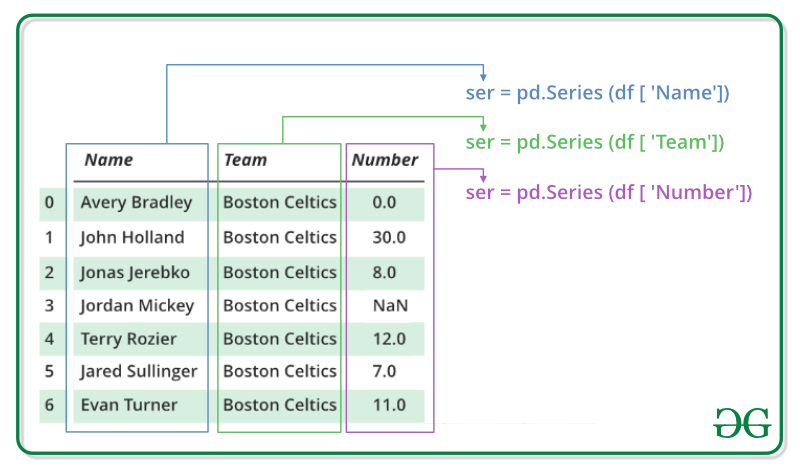

To access columns, simply type in:

 `pd.Series(<panda_object_variable_name>['<Case Sensitive Column Name'])`

Let's try this on our Formula One dataset, shall we? Let's try to get just the Title column. To do this, we need to provide the exact name of the column "TITLE" since it's case sensitive.

In [40]:
print(pd.Series(formula_one_df['TITLE']))

0         Brawn GP F1 Team
1         Caterham F1 Team
2      Force India F1 Team
3     Honda Racing F1 Team
4              HRT F1 Team
5            Lotus F1 Team
6         Marussia F1 Team
7          McLaren F1 Team
8      Mercedes GP F1 team
9          Midland F1 Team
10         Red Bull Racing
11         Renault F1 Team
12          Sauber F1 Team
13        Scuderia Ferrari
14     Scuderia Toro Rosso
15          Spyker F1 Team
16     Super Aguri F1 Team
17              Team Lotus
18           Toyota Racing
19           Virgin Racing
20         Williams Racing
Name: TITLE, dtype: object


Just like that, we were able to use Series to build or filter a column with or without custom indexes! 
Series also comes with various functions and operations that can be utilized based on your use case. You can check out the other parameters along with examples [by visiting the **documentation**](https://pandas.pydata.org/docs/user_guide/dsintro.html#series).

Now, remember, Series is only _one-dimensional_, so if we need multiple columns, we need to use DataFrame instead.

### DataFrame

**DataFrame** is a _two-dimensional_ data structure with labeled axes (i.e, rows and columns) that can accept different data types, even Series. In fact, the function we used at the beginning **read_excel()** turns the Excel data into a DataFrame object! With DataFrame, we can explore data in a tabular fashion through its three components: the data, rows, and columns. To create a Series, simply type in:

`pd.DataFrame(data, index=index, column=columns)`

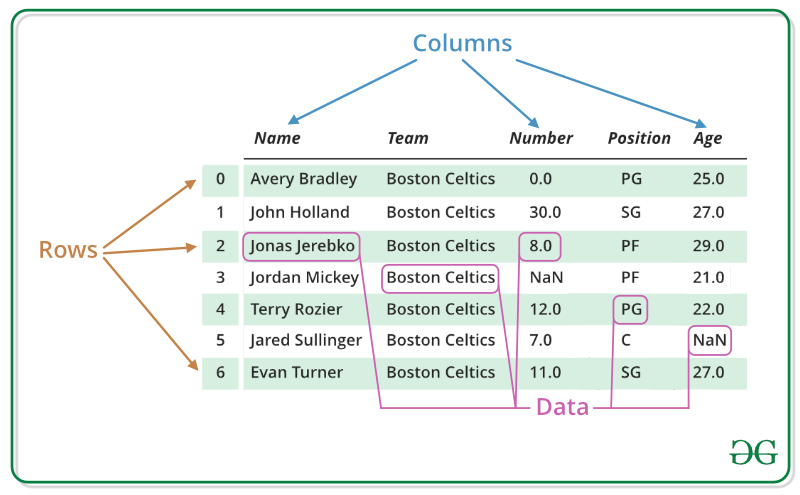

The **column** parameter lets you specify the column names, while the **index** parameter serves the same purpose as Series indexes. Moreover, **indexing** is particularly important in DataFrame as it serves as the determining factor when grouping data by **rows**.

First, let's try creating a DataFrame by emulating the dictionary values we had in Module 4 - with the artist names serving as the indexes. We can create a tabular view of the values by storing the 2 dictionaries in a list, as seen in the **favorite_songs** variable.

In [48]:
first_favorite_songs = {"Queen": "Bohemian Rhapsody", "Oasis": "Stand by Me", "Radiohead": "Creep", "Mac Miller": "Self Care"}
second_favorite_songs = {"Queen": "Radio Ga Ga", "Oasis": "Live Forever", "Radiohead": "Karma Police", "Mac Miller": "Blue World"}

favorite_songs = [first_favorite_songs, second_favorite_songs]
print(pd.DataFrame(favorite_songs))

               Queen         Oasis     Radiohead  Mac Miller
0  Bohemian Rhapsody   Stand by Me         Creep   Self Care
1        Radio Ga Ga  Live Forever  Karma Police  Blue World


Aside from this, we can also use **Series** in a DataFrame. Let's try this by reusing the **four_fruits_pd** variable. This time around, we'll create another Series with 4 fruits beginning with the same letters. To declare the name of the 2 columns, we'll make use of a dictionary wherein the key is the column name and the value is the corresponding Series.

In [50]:
four_fruits_data = {
    "First": pd.Series(['Apple', 'Banana', 'Carrot', 'Dates'], index=['A', 'B', 'C', 'D']),
    "Second": pd.Series(['Apricot', 'Blueberry', 'Cantaloupe', 'Durian'], index=['A', 'B', 'C', 'D'])
}

print(pd.DataFrame(four_fruits_data))

    First      Second
A   Apple     Apricot
B  Banana   Blueberry
C  Carrot  Cantaloupe
D   Dates      Durian


Let's not forget that Pandas objects have the ability accept different data types. For example, we can also provide Boolean, integers, or floating point numbers. We can also pass multiple data using lists enclosed in a dictionary:

In [53]:
average_data = {
    "08/19/21": [44.2, 33.6, 32.0, 76, 5.1],
    "08/20/21": [-23.2, 41, 66.7, 99.3, 10],
    "Verified": [True, False, True, True, True]
}

print(pd.DataFrame(average_data))

   08/19/21  08/20/21  Verified
0      44.2     -23.2      True
1      33.6      41.0     False
2      32.0      66.7      True
3      76.0      99.3      True
4       5.1      10.0      True


Likewise, DataFrame observes a **_dictionary-like_** structure. This means we can access and modify values by supplying the index name to the Pandas object variable name. Getting, setting, and deleting columns works with the same syntax, such as:

`<variable_name>['<index_name>']`

In [90]:
average_df = pd.DataFrame(average_data, index=['A', 'B', 'C', 'D', 'E']);

# Multiply the values first column by 2 and assign the corresponding products to the second column
average_df["08/20/21"] = average_df["08/19/21"] * 2
# Set all Verified values to True
average_df["Verified"] = True

print(average_df)

# Delete the Verified column
del average_df["Verified"]

print(average_df)

# Add back the Verified column
average_df["Verified"] = [False, True, False, True, True]

print(average_df)

   08/19/21  08/20/21  Verified
A      44.2      88.4      True
B      33.6      67.2      True
C      32.0      64.0      True
D      76.0     152.0      True
E       5.1      10.2      True
   08/19/21  08/20/21
A      44.2      88.4
B      33.6      67.2
C      32.0      64.0
D      76.0     152.0
E       5.1      10.2
   08/19/21  08/20/21  Verified
A      44.2      88.4     False
B      33.6      67.2      True
C      32.0      64.0     False
D      76.0     152.0      True
E       5.1      10.2      True


**DataFrame** also comes with extensive functions and operations that can be utilized based on your use case. You can check out the other parameters along with examples [by visiting the **documentation**](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe).

## Indexing and Selection

The following indexing/selection methods can be performed in Pandas:
- Selecting a **single column** (i.e., by providing the **column name**)
- Selection by **slicing rows** (i.e., by slicing the **numerical sequences of indexes** starting from 0))
- Selection by **label** (i.e., **loc[]** by providing the **index name**)
- Selection by **position** (i.e., **iloc[]** using **numerical sequence of the row** starting from 0)
- **Boolean indexing** (i.e., **isin()** or **logical comparisons**)

In [95]:
print('Selecting a single column')
print(average_df["08/20/21"])

print('\nSelection by slicing rows (i.e., indexes)')
print(average_df[1:3]) # return only index 1 and 2

print('\nSelection by label (i.e., index/row)')
print(average_df.loc['D'])
print('---')
print(average_df.loc['D', ["08/19/21", "08/20/21"]]) # Exclude Verified column
print('---')
print(average_df.loc['D', "08/19/21"]) # Return only the value on column 08/19/21 row D

print('\nSelection by position (i.e., numerical sequence of the row starting from 0)')
print(average_df.iloc[3]) # 3 = D
print('---')
print(average_df.iloc[3, :-1]) # Exclude Verified column
print('---')
print(average_df.iloc[3, 0]) # Return only the value on column 08/19/21 row D

print('\nBoolean indexing')
print(average_df[average_df['Verified']]) # return only rows wherein Verified == True
print('---')
print(average_df[average_df["08/20/21"].isin([152.0, 88.4])]) # return only rows wherein 08/20/21 has 152.0 or 88.4

Selecting a single column
A     88.4
B     67.2
C     64.0
D    152.0
E     10.2
Name: 08/20/21, dtype: float64

Selection by slicing rows (i.e., indexes)
   08/19/21  08/20/21  Verified
B      33.6      67.2      True
C      32.0      64.0     False

Selection by label (i.e., index/row)
08/19/21     76.0
08/20/21    152.0
Verified     True
Name: D, dtype: object
---
08/19/21     76.0
08/20/21    152.0
Name: D, dtype: object
---
76.0

Selection by position (i.e., numerical sequence of the row starting from 0)
08/19/21     76.0
08/20/21    152.0
Verified     True
Name: D, dtype: object
---
08/19/21     76.0
08/20/21    152.0
Name: D, dtype: object
---
76.0

Boolean indexing
   08/19/21  08/20/21  Verified
B      33.6      67.2      True
D      76.0     152.0      True
E       5.1      10.2      True
---
   08/19/21  08/20/21  Verified
A      44.2      88.4     False
D      76.0     152.0      True


## Statistical Operations

Now, let's explore descriptive statistics in Pandas! Below are the common functions available to perform statistical operations:

> **NOTE**: All such methods have a skipna option signaling whether to exclude missing data (True by default). You can also try exploring how to work with missing data [by visiting the documentation](https://pandas.pydata.org/docs/user_guide/missing_data.html).

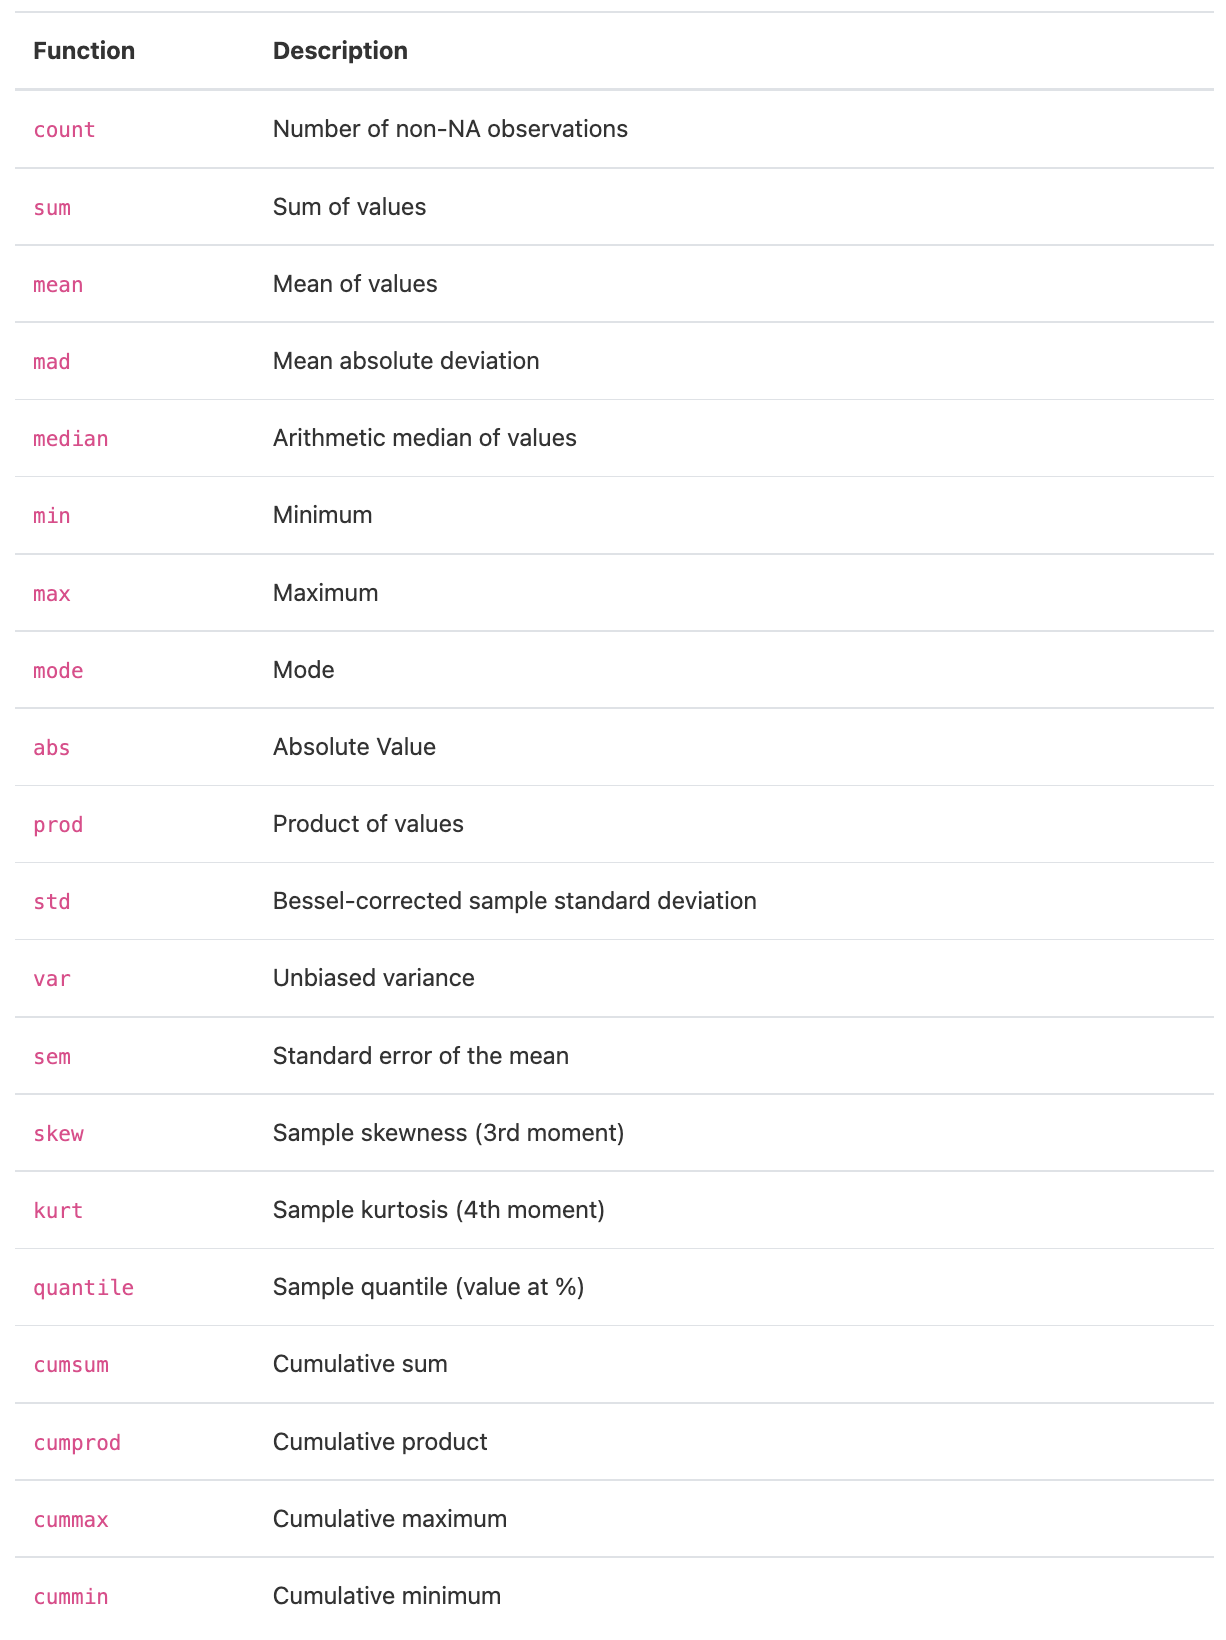

> Aside from these, there's also **idxmin()** and **idxmax()**, which work just the same as **min()** and **max()** but return the row/index value instead of the data. These can be used on both Series and DataFrame objects.

Let's now make use of our Formula One dataset using the **formula_one_df** variable to derive some valuable stats.

In [125]:
formula_one_df.style

,RANK,TITLE,CHAMPIONSHIPS,WIN,PODIUM,POINTS SCORED,POLE POSITION,FASTEST LAP,RACE ENTRY,SEASONS
0,1,Brawn GP F1 Team,1,8,15,448,5,4,17,1
1,2,Caterham F1 Team,0,0,0,0,0,0,39,2
2,3,Force India F1 Team,0,0,1,359,1,1,112,6
3,4,Honda Racing F1 Team,0,1,3,302,1,0,53,3
4,5,HRT F1 Team,0,0,0,0,0,0,58,3
5,6,Lotus F1 Team,0,2,24,618,0,5,39,2
6,7,Marussia F1 Team,0,0,0,0,0,0,39,2
7,8,McLaren F1 Team,0,35,131,2839,32,26,147,8
8,9,Mercedes GP F1 team,0,4,15,881,9,4,77,4
9,10,Midland F1 Team,0,0,0,3,0,0,18,1


Let's try to get the following using the common statistical functions:
1. Average number of points scored by the 21 teams
2. Team with the highest number of wins
3. Team that partook in the least number of seasons
4. The median value of the points scored by the 21 teams

Would you like to try this for yourself? If yes, go ahead and make use of the Code cell below!

In [ ]:
# Enter your code here and click on Run to check the results






How was it? Were you able to get the values? Check out the code below if you need help:

In [113]:
# Average number of points scored by the 21 teams
print(formula_one_df['POINTS SCORED'].mean())

# Team with the highest number of wins
highest_points_index = formula_one_df['POINTS SCORED'].idxmax() # get the index of the row with max() value of points scored
print(formula_one_df.loc[highest_points_index, 'TITLE']) # get title of the highest_points_index row

# Team that partook in the least number of seasons
least_seasons_index = formula_one_df['SEASONS'].idxmin()
print(formula_one_df.loc[least_seasons_index, 'TITLE']) # get title of the least_seasons_index row

# Median value of the points scored by the 21 teams
print(formula_one_df['POINTS SCORED'].median())

701.7142857142857
Scuderia Ferrari
Brawn GP F1 Team
359.0


## Closing and Useful Materials

Just like that, we were able to use Pandas to perform basic data analysis! I know this module is too short to tackle everything, so if you'd like to know more, please give the following a look:
- [**10 Minutes to Pandas**](https://pandas.pydata.org/docs/user_guide/10min.html)
- [**Essential Basic Pandas Functionality**](https://pandas.pydata.org/docs/user_guide/basics.html)
- [**Introduction to Pandas in Python**](https://www.geeksforgeeks.org/introduction-to-pandas-in-python/)
- [**Pandas Cookbook**](https://pandas.pydata.org/docs/user_guide/cookbook.html)
- [**Pandas Cheat Sheet**](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

Thank you for sticking around and setting aside some time to explore this complementary module. Again, congratulations for reaching the end of the course! If you want to learn more, feel free to explore other ASSIST modules.